In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [76]:
df = pd.read_csv(r"C:\Users\gokul\Downloads\diabetes.csv")

In [77]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50.0,1
1,1,85,66,29,0,26.6,0.351,31.0,0
2,8,183,64,0,0,23.3,0.672,32.0,1
3,1,89,66,23,94,28.1,0.167,21.0,0
4,0,137,40,35,168,43.1,2.288,33.0,1


In [4]:
df.shape

(768, 9)

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         4
Outcome                     0
dtype: int64

In [6]:
df['Age'].fillna(df['Age'].mean(), inplace= True)

C:\Users\gokul\AppData\Local\Temp\ipykernel_27676\1444409324.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace= True)


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 54.1 KB


<Axes: >

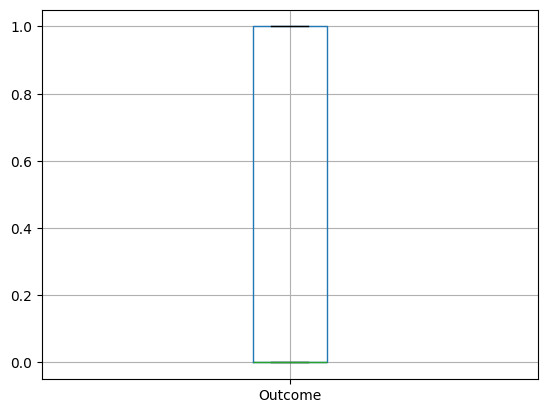

In [9]:
df.boxplot('Outcome')

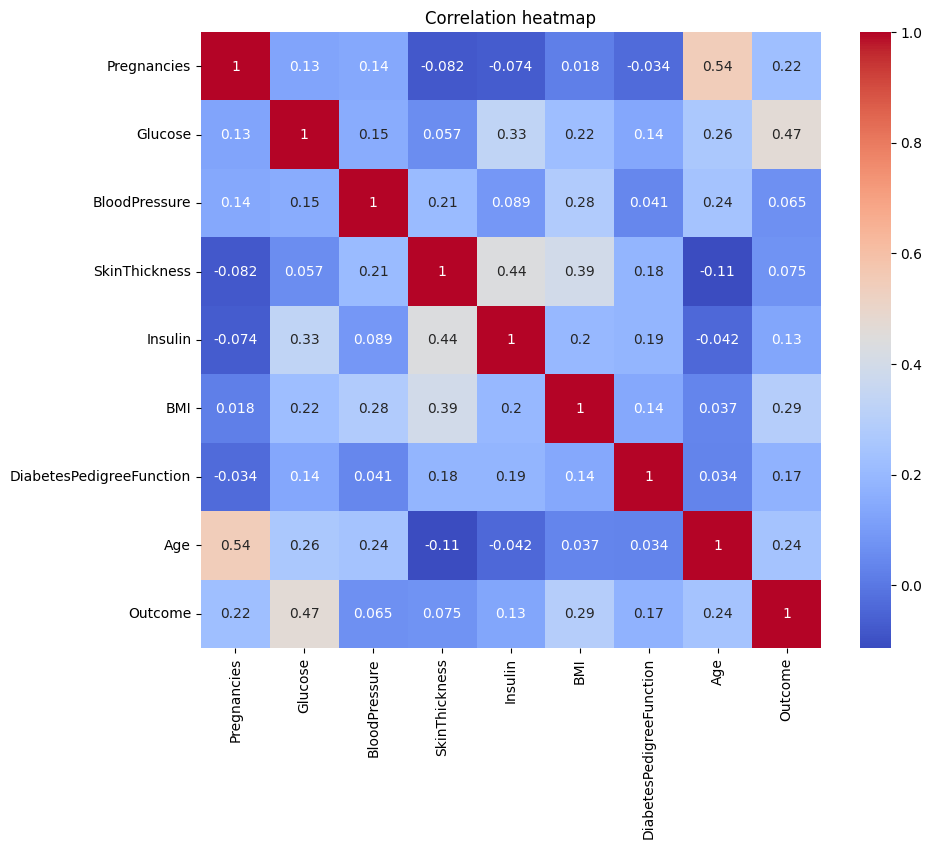

In [10]:
plt.figure(figsize =(10,8))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.title('Correlation heatmap')
plt.show()

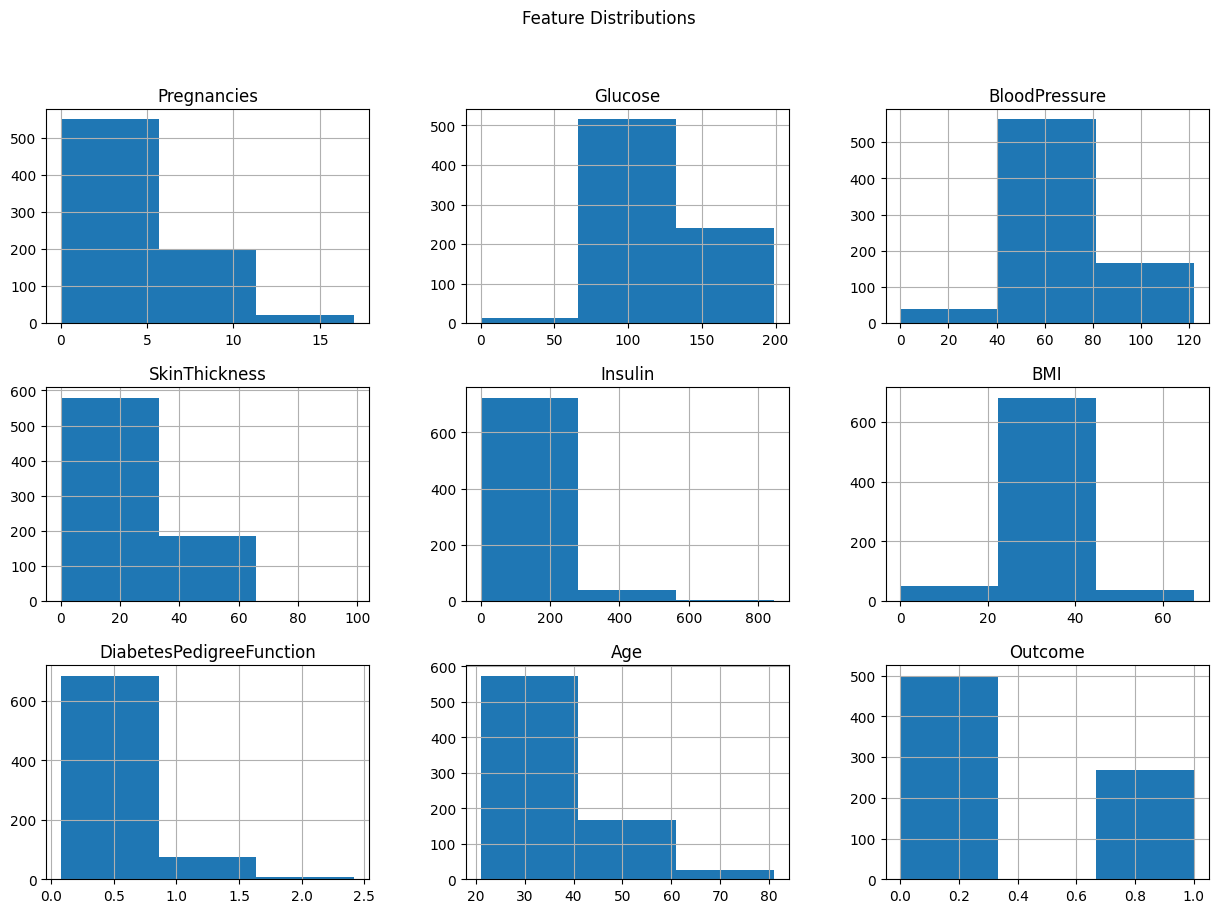

In [11]:
df.hist(bins= 3, figsize = (15,10))
plt.suptitle("Feature Distributions")
plt.show()

#bins data distribution

In [12]:
X = df.drop(columns ='Outcome')

In [13]:
y = df['Outcome']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.2, random_state = 3)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


In [16]:
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

C:\Users\gokul\anaconda3\envs\work\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
log_accuracy_1 = log_model.score(X_train,y_train)
print(f'log accuracy of training data:{log_accuracy_1: .2f}')
log_accuracy_2 = log_model.score(X_test,y_test)
print(f'log accuracy of test data: {log_accuracy_2: .2f}')

log accuracy of training data: 0.79
log accuracy of test data:  0.74


In [18]:
#Adding Hyper parameter

In [19]:
#help(LogisticRegression)

In [20]:
log_model_2 = LogisticRegression(tol=0.0001, C=0.5, max_iter=1000, solver='newton-cholesky', multi_class='ovr', random_state=5, class_weight={0:2, 1:4})
log_model_2.fit(X_train,y_train)

C:\Users\gokul\anaconda3\envs\work\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=0.5, class_weight={0: 2, 1: 4}, max_iter=1000,
                   multi_class='ovr', random_state=5, solver='newton-cholesky')

In [21]:
log_accuracy_3 = log_model_2.score(X_train,y_train)
print(f'Logistic accuracy of Training Model: {log_accuracy_3: .2f}')
log_accuracy_4 = log_model_2.score(X_test,y_test)
print(f'Logistic accuracy of Test Model: {log_accuracy_4: .2f}')

Logistic accuracy of Training Model:  0.76
Logistic accuracy of Test Model:  0.75


In [22]:
#Adding more Hyper parameter

In [23]:
log_model_3 = LogisticRegression(penalty='l2', solver='sag', C=1.0, random_state=33)


#penalty='l2' - Regularization is a technique to prevent overfitting by adding a penalty to the model's complexity.
#L2 regularization helps prevent large coefficients, making the model simpler and less likely to overfit. It encourages smaller weights across all features.

In [24]:
log_accuracy_5 = log_model_2.score(X_train,y_train)
log_accuracy_6 = log_model_2.score(X_test,y_test)

In [25]:
log_accuracy_5
log_accuracy_6

0.7532467532467533

In [26]:
y_test_log_model_2 = log_model_2.predict(X_test)

In [27]:
print(classification_report(y_test, y_test_log_model_2))

              precision    recall  f1-score   support

           0       0.84      0.73      0.78        92
           1       0.66      0.79      0.72        62

    accuracy                           0.75       154
   macro avg       0.75      0.76      0.75       154
weighted avg       0.77      0.75      0.76       154



In [28]:
y_test_log_model = log_model.predict(X_test)

In [29]:
print(classification_report(y_test, y_test_log_model))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80        92
           1       0.73      0.56      0.64        62

    accuracy                           0.74       154
   macro avg       0.74      0.71      0.72       154
weighted avg       0.74      0.74      0.73       154



In [ ]:
#Additional Preprocessing

In [78]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50.0,1
1,1,85,66,29,0,26.6,0.351,31.0,0
2,8,183,64,0,0,23.3,0.672,32.0,1
3,1,89,66,23,94,28.1,0.167,21.0,0
4,0,137,40,35,168,43.1,2.288,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63.0,0
764,2,122,70,27,0,36.8,0.340,27.0,0
765,5,121,72,23,112,26.2,0.245,30.0,0
766,1,126,60,0,0,30.1,0.349,47.0,1


In [79]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50.0,1
1,1,85,66,29,0,26.6,0.351,31.0,0
2,8,183,64,0,0,23.3,0.672,32.0,1
3,1,89,66,23,94,28.1,0.167,21.0,0
4,0,137,40,35,168,43.1,2.288,33.0,1


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       764 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 54.1 KB


In [81]:
df['BMI']

0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
763    32.9
764    36.8
765    26.2
766    30.1
767    30.4
Name: BMI, Length: 768, dtype: float64

In [82]:
NewBMI = pd.Series(['Underweight', 'Normal', 'Overweight', 'obesity_1', 'obesity_2', 'obesity_3'], dtype = 'category')

In [92]:
df['NewBMI'] = NewBMI
df.loc[df['BMI']<18.5 , 'NewBMI'] = NewBMI[0]
df.loc[(df['BMI']>18.5) & df['BMI']<=24.5 , 'NewBMI'] = NewBMI[1]
df.loc[(df['BMI']>24.5) & df['BMI']<=29.9, 'NewBMI'] = NewBMI[2]
df.loc[(df['BMI']>29.9) & df['BMI']<=34.9, 'NewBMI']  = NewBMI[3]
df.loc[(df['BMI']>34.9) & df['BMI']<=39.9, 'NewBMI']  = NewBMI[4]
df.loc[df['BMI']>39.9, 'NewBMI'] = NewBMI[5]

In [93]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI
0,6,148,72,35,0,33.6,0.627,50.0,1,obesity_2
1,1,85,66,29,0,26.6,0.351,31.0,0,obesity_2
2,8,183,64,0,0,23.3,0.672,32.0,1,obesity_2
3,1,89,66,23,94,28.1,0.167,21.0,0,obesity_2
4,0,137,40,35,168,43.1,2.288,33.0,1,obesity_3
